In [1]:
import cv2
import os
import PIL
import skimage
from skimage import data
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    image_name=[]
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
            image_name.append(str(f))
    return images, labels,image_name

In [4]:
ROOT_PATH = '/home/tang/targa/exp4/'

train_data_directory = os.path.join(ROOT_PATH, "splitData/secondSplitDataset/16*8/train")
test_data_directory = os.path.join(ROOT_PATH, "splitData/secondSplitDataset/16*8/test")
validation_data_directory = os.path.join(ROOT_PATH,'splitData/secondSplitDataset/16*8/validation')
total_data_directory = os.path.join(ROOT_PATH, "size16*8/total_data")

In [5]:
#os.listdir(total_data_directory+'/0')

In [6]:
Images,Labels,Image_names = load_data(total_data_directory)

In [7]:
os.path.basename(Image_names[0])

'J_saltnoise_amount_0.428.jpg'

In [8]:
Image_names[7]

'/home/tang/targa/exp4/size16*8/total_data/J/J_perspective_0_2_0_14_7_14_7_3.jpg'

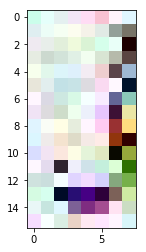

In [9]:
plt.imshow(Images[0])

In [10]:
Labels[0]

'J'

In [11]:
len(Labels)

23017

In [12]:
#########define percentage of dataset
total_number = len(Labels)
train_number = int(total_number*float(0.8000))
test_number = int(total_number*float(0.1000))
validation_number = total_number-train_number-test_number

In [13]:
print('- Training-set:\t\t{}'.format(train_number))
print('- Test-set:\t\t{}'.format(test_number))
print('- Validation-set:\t{}'.format(validation_number))

- Training-set:		18413
- Test-set:		2301
- Validation-set:	2303


In [14]:
##########create train test and validation directory
if not os.path.exists(train_data_directory):
    os.makedirs(train_data_directory)
if not os.path.exists(test_data_directory):
    os.makedirs(test_data_directory)
if not os.path.exists(validation_data_directory):
    os.makedirs(validation_data_directory)


In [15]:
#########make label directory
for i in Labels:
    trainlabels_directory = os.path.join(train_data_directory, i)
    testlabels_directory = os.path.join(test_data_directory, i)
    validationlabels_directory = os.path.join(validation_data_directory, i)
    if not os.path.exists(trainlabels_directory):
        os.makedirs(trainlabels_directory)
    if not os.path.exists(testlabels_directory):
        os.makedirs(testlabels_directory)
    if not os.path.exists(validationlabels_directory):
        os.makedirs(validationlabels_directory)

In [16]:
from random import sample


In [17]:
################KEEP distribution all the same pseudo-random
random.seed(3)
# for i in range(5):
#     print(random.randint(1,100))

In [18]:
a=[]
for i in range(50):
    a.append(i)
    

In [19]:
sample(a,5)

[15, 37, 34, 8, 23]

In [20]:
totalset_index = []
trainset_index = []
testset_index=[]
validationset_index=[]


In [21]:
#########generate total images index
for i in range(0,len(Labels)):
    totalset_index.append(str(i))

In [22]:
random.seed(3)
trainset_index = sample(totalset_index,train_number)

In [23]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	23017
- Training-set index length:		18413
- Testing-set index length:		0
- Validation-set index length:	0


In [24]:
for i in trainset_index:
    filename = train_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
    plt.imsave(filename,Images[int(i)])
    #print(filename)
    totalset_index.remove(i)

In [25]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	4604
- Training-set index length:		18413
- Testing-set index length:		0
- Validation-set index length:	0


In [26]:
random.seed(3)
testset_index= sample(totalset_index,test_number)

In [27]:
for i in testset_index:
    filename = test_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
    plt.imsave(filename,Images[int(i)])
    #print(filename)
    totalset_index.remove(i)
 

In [28]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	2303
- Training-set index length:		18413
- Testing-set index length:		2301
- Validation-set index length:	0


In [29]:
random.seed(3)
validationset_index= sample(totalset_index,validation_number)

In [30]:
for i in validationset_index:
    filename = validation_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
    plt.imsave(filename,Images[int(i)])
    #print(filename)
    totalset_index.remove(i)

In [31]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	0
- Training-set index length:		18413
- Testing-set index length:		2301
- Validation-set index length:	2303
